# 자율주행 과목 과제 문제 분석

In [1]:
import numpy as np
from scipy.io import loadmat
dataset = "20220331T160645_ProjectData.mat"
datas = loadmat(dataset)

In [2]:
list(datas.keys())

['__header__',
 '__version__',
 '__globals__',
 'Ax_stack',
 'Ay_stack',
 'Ibeo_DeviceID_stack',
 'Ibeo_Layer_stack',
 'Ibeo_X_stack',
 'Ibeo_Y_stack',
 'Ibeo_Z_stack',
 'Left_Lane_InfoA_Quaility_stack',
 'Left_Lane_InfoB_Lane_View_Range_End_stack',
 'Left_Lane_InfoB_Lane_View_Range_Start_stack',
 'Right_Lane_InfoA_Quaility_stack',
 'Right_Lane_InfoB_Lane_View_Range_End_stack',
 'Right_Lane_InfoB_Lane_View_Range_Start_stack',
 'SAS_Angle_stack',
 'Vx_stack',
 'YAW_RATE_stack',
 'dash_cam_stack',
 'poly_vision_left_stack',
 'poly_vision_right_stack']

## 1. 필요하다고 생각되는 데이터들만 모아보기

1. Ibeo_DeviceID_stack
    - 어떤 lidar에서 나오는 pcl인지 파악할 수 있음
1. Ibeo_Layer_stack
    - 라이다에서 나오는 stack을 구분하여 pcl을 파악할 수 있음. 어떤 stack을 쓸지 결정하는데 도움이 됨.
1. Ibeo_X, Y, Z_stack
    - 라이다에서 나오는 pcl 데이터를 의미함.
    
**데이터셋 분석하기**
1. 0.1초 간격으로 데이터를 쌓았으며, 총 594개가 있음.
2. 각 간격마다 데이터의 길이가 다름. 이는 return 안되면 표시 안한듯함.

In [3]:
datas_filtered_01 = {}
datas_filtered_01['Ibeo_DeviceID_stack'] = datas['Ibeo_DeviceID_stack']
datas_filtered_01['Ibeo_Layer_stack'] = datas['Ibeo_Layer_stack']
datas_filtered_01['Ibeo_X_stack'] = datas['Ibeo_X_stack']
datas_filtered_01['Ibeo_Y_stack'] = datas['Ibeo_Y_stack']
datas_filtered_01['Ibeo_Z_stack'] = datas['Ibeo_Z_stack']

### 1-1. 전체 데이터 표현하기

#### 1-1-1. 첫번째 데이터셋만 표현하기
#### 1-1-2. 전체 데이터셋 animation으로 표현하기

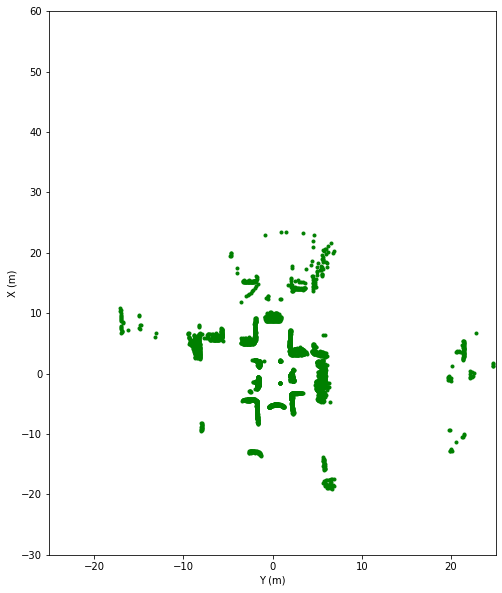

In [4]:
# 1-1-1. 첫번째 데이터셋만 표현하기
import matplotlib.pyplot as plt

# plotting 제한
xlim = [-25, 25]
ylim = [-30, 60]

X_0 = datas_filtered_01['Ibeo_X_stack'][0][0]
Y_0 = datas_filtered_01['Ibeo_Y_stack'][0][0]
Z_0 = datas_filtered_01['Ibeo_Z_stack'][0][0]

plt.figure(figsize=(8,10))
plt.plot(Y_0, X_0, 'g.')
plt.xlabel('Y (m)')
plt.ylabel('X (m)')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [6]:
%matplotlib notebook

In [16]:
# DataNum Squeeze
Data = datas_filtered_01["Ibeo_X_stack"].squeeze()
print(Data.shape)

X_0 = Data[0].squeeze()
print(X_0.shape)

(594,)
(4375,)


<IPython.core.display.Javascript object>


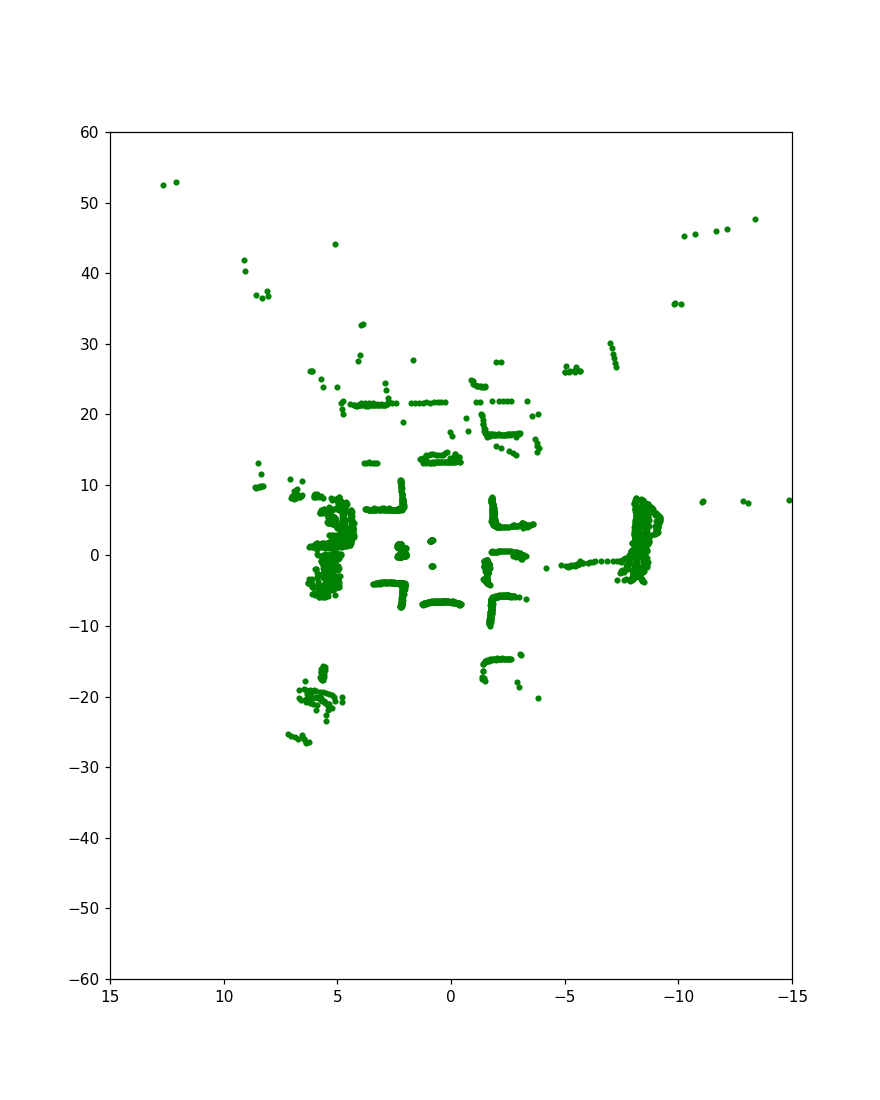

<class 'matplotlib.lines.Line2D'>


In [6]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 10))
line, = ax.plot([], 'g.')     # A tuple unpacking to unpack the only plot
ax.set_xlim(15, -15)
ax.set_ylim(-60, 60)
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])

print(type(line))

def animate(ind):
    X, Y = datas_filtered_01['Ibeo_X_stack'][0][ind], datas_filtered_01['Ibeo_Y_stack'][0][ind]
    line.set_data((Y, X))

anim = FuncAnimation(fig, animate, frames=594, interval=10)

### 1-2. 디바이스 ID에 따라서 표현하기
#### 1-2-1. 첫번째 데이터셋만 표현하기
#### 1-2-2. 전체 데이터셋으로 각각 animation 표현하기

<IPython.core.display.Javascript object>


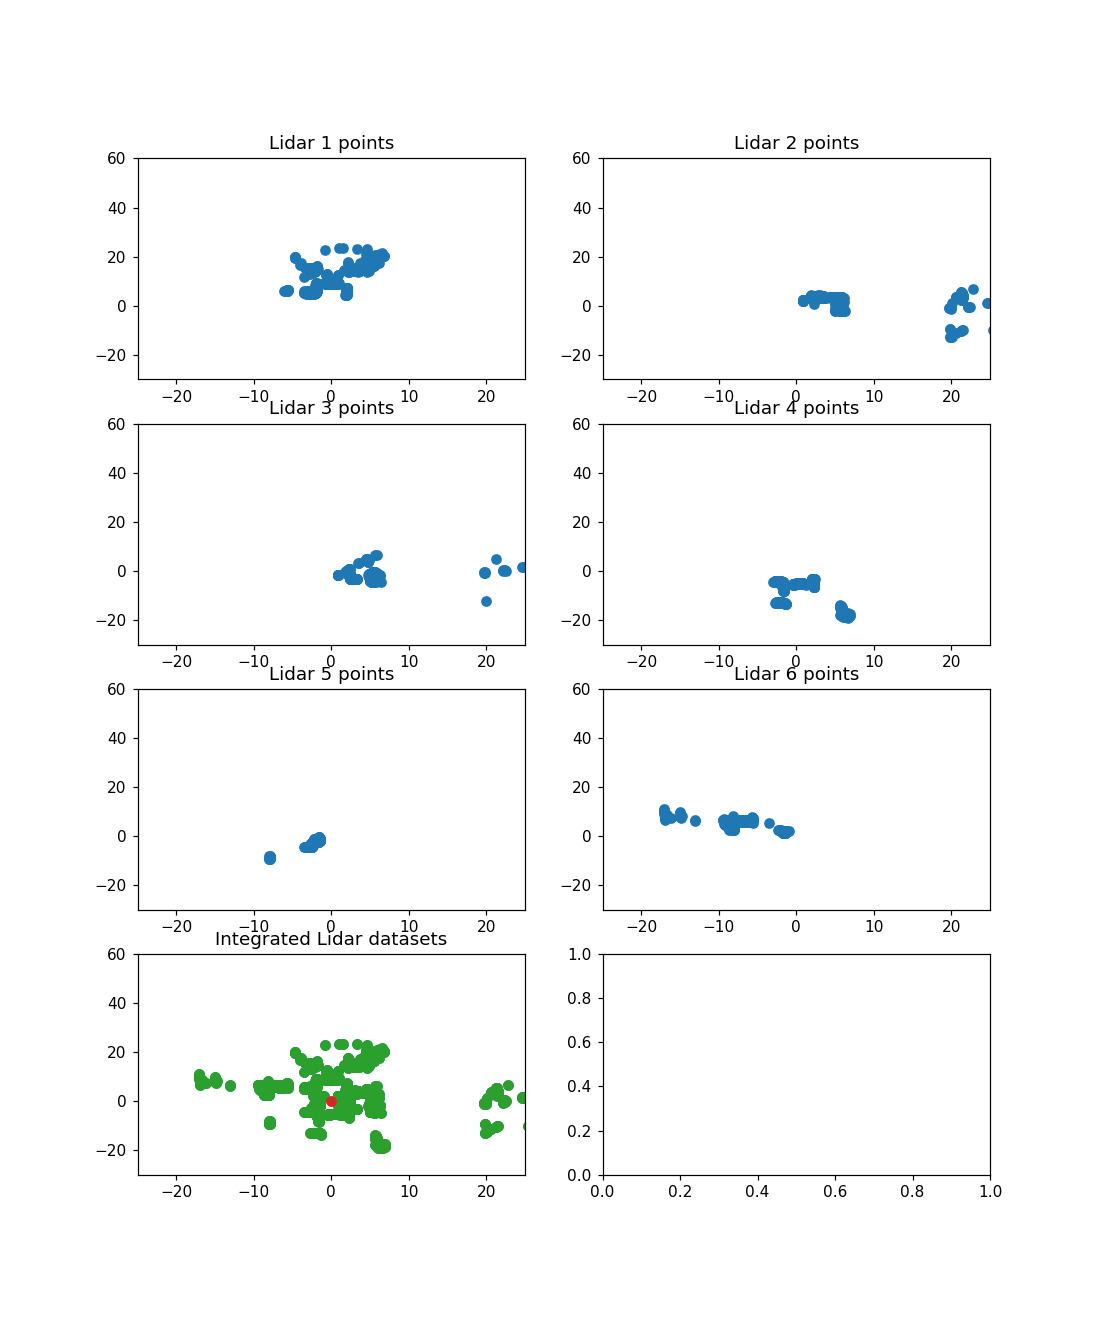

In [35]:
fig, ((ax11, ax12), (ax21, ax22), (ax31, ax32), (ax41, _)) = plt.subplots(4,2, figsize=(10, 12)) # (x, y)

axs = [ax11, ax12, ax21, ax22, ax31, ax32]

Index_0 = datas_filtered_01['Ibeo_DeviceID_stack'][0][0]

# Masking datas
for i, ax in enumerate(axs):
    masking = (Index_0 == i+1)
    X = X_0[masking]
    Y = Y_0[masking]
    ax.scatter(Y, X)
    ax.set_xlim([-25, 25])
    ax.set_ylim([-30, 60])
    title = f"Lidar {i+1} points"
    ax.set_title(title)

ax41.scatter(Y_0, X_0)
ax41.scatter(0, 0)

ax41.set_xlim([-25, 25])
ax41.set_ylim([-30, 60])
# title = f"Lidar {i+1} points"
ax41.set_title("Integrated Lidar datasets")

plt.show()

<IPython.core.display.Javascript object>


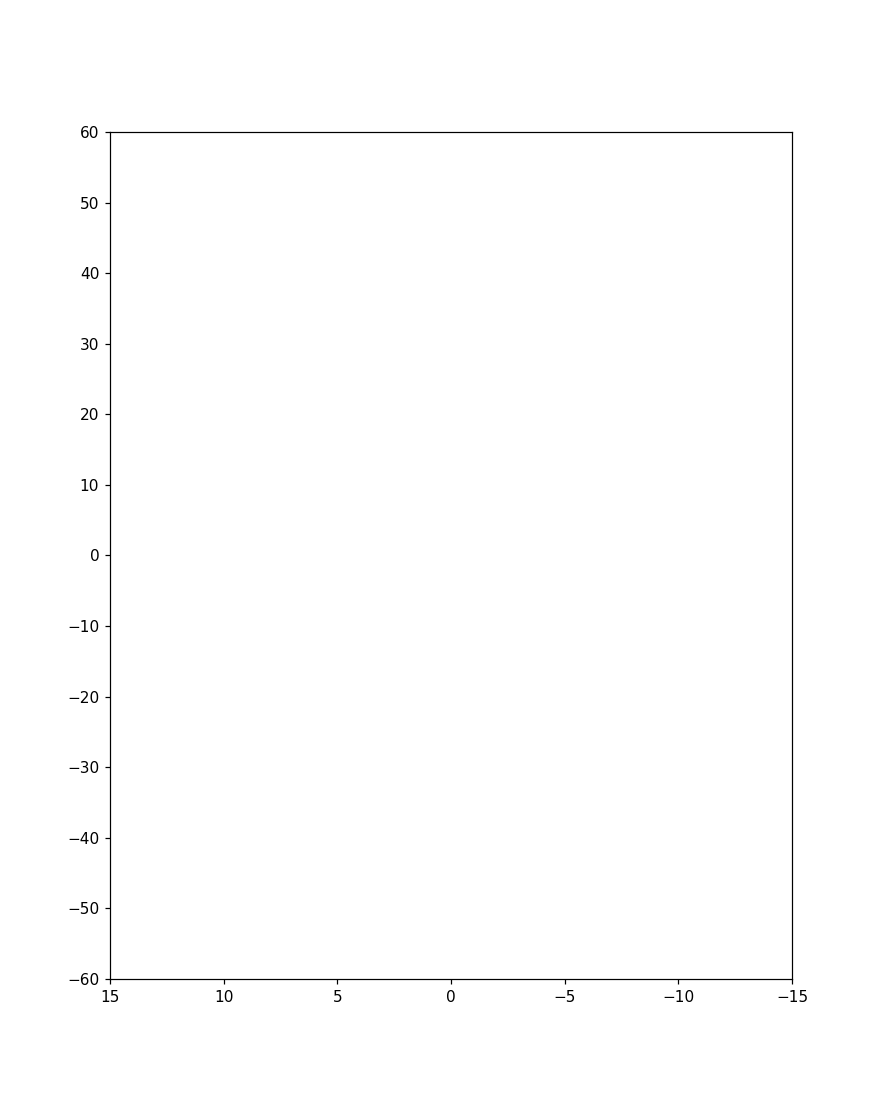

/home/mint-lab/anaconda3/envs/dl_ws/lib/python3.9/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [36]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8, 10))
line, = ax.plot([], 'g.')     # A tuple unpacking to unpack the only plot
ax.set_xlim(15, -15)
ax.set_ylim(-60, 60)
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])

index = 1

def animate(ind):
    Index = datas_filtered_01['Ibeo_DeviceID_stack'][0][ind]
    masking = (Index == index)    
    X, Y = datas_filtered_01['Ibeo_X_stack'][0][ind], datas_filtered_01['Ibeo_Y_stack'][0][ind]
    X = X[masking]
    Y = Y[masking]
    line.set_data((Y, X))

anim = FuncAnimation(fig, animate, frames=594, interval=10)

### 1-3. Stack에 따라서 표현하기
#### 1-3-1. 첫번째 데이터셋만 표현하기
#### 1-3-2. 전체 데이터셋으로 각각 animation 표현하기

<IPython.core.display.Javascript object>


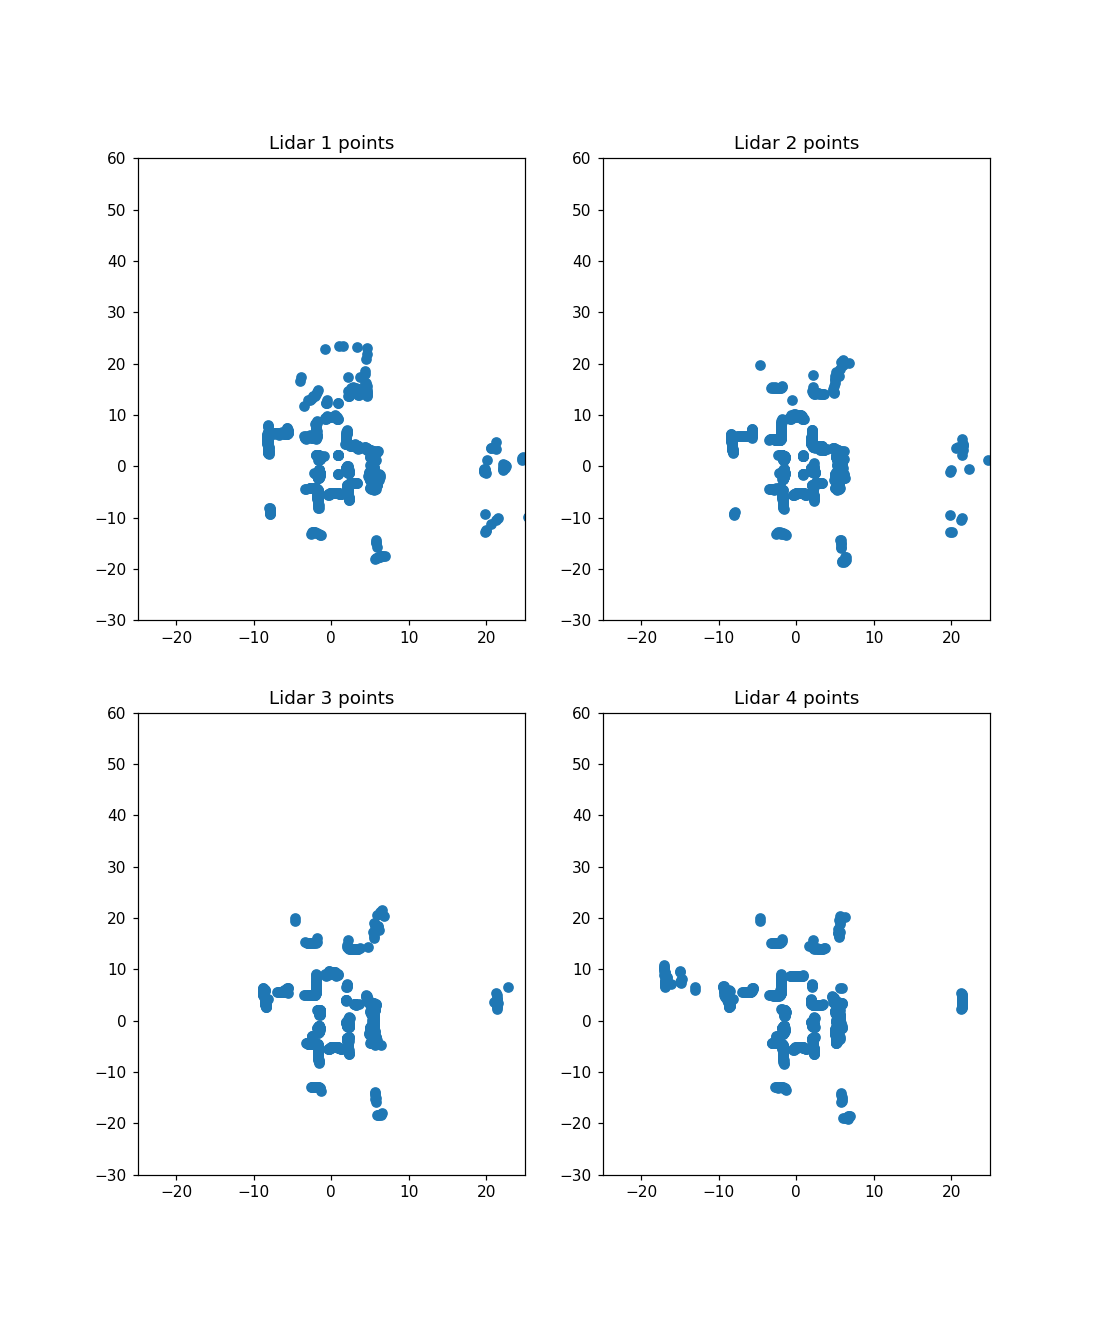

In [37]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2,2, figsize=(10, 12)) # (x, y)

axs = [ax11, ax12, ax21, ax22]

Layer_0 = datas_filtered_01['Ibeo_Layer_stack'][0][0]

# Masking datas
for i, ax in enumerate(axs):
    masking = (Layer_0 == i)
    X = X_0[masking]
    Y = Y_0[masking]
    ax.scatter(Y, X)
    ax.set_xlim([-25, 25])
    ax.set_ylim([-30, 60])
    title = f"Lidar {i+1} points"
    ax.set_title(title)

ax41.scatter(Y_0, X_0)
ax41.scatter(0, 0)

ax41.set_xlim([-25, 25])
ax41.set_ylim([-30, 60])
# title = f"Lidar {i+1} points"
ax41.set_title("Integrated Lidar datasets")

plt.show()

<IPython.core.display.Javascript object>


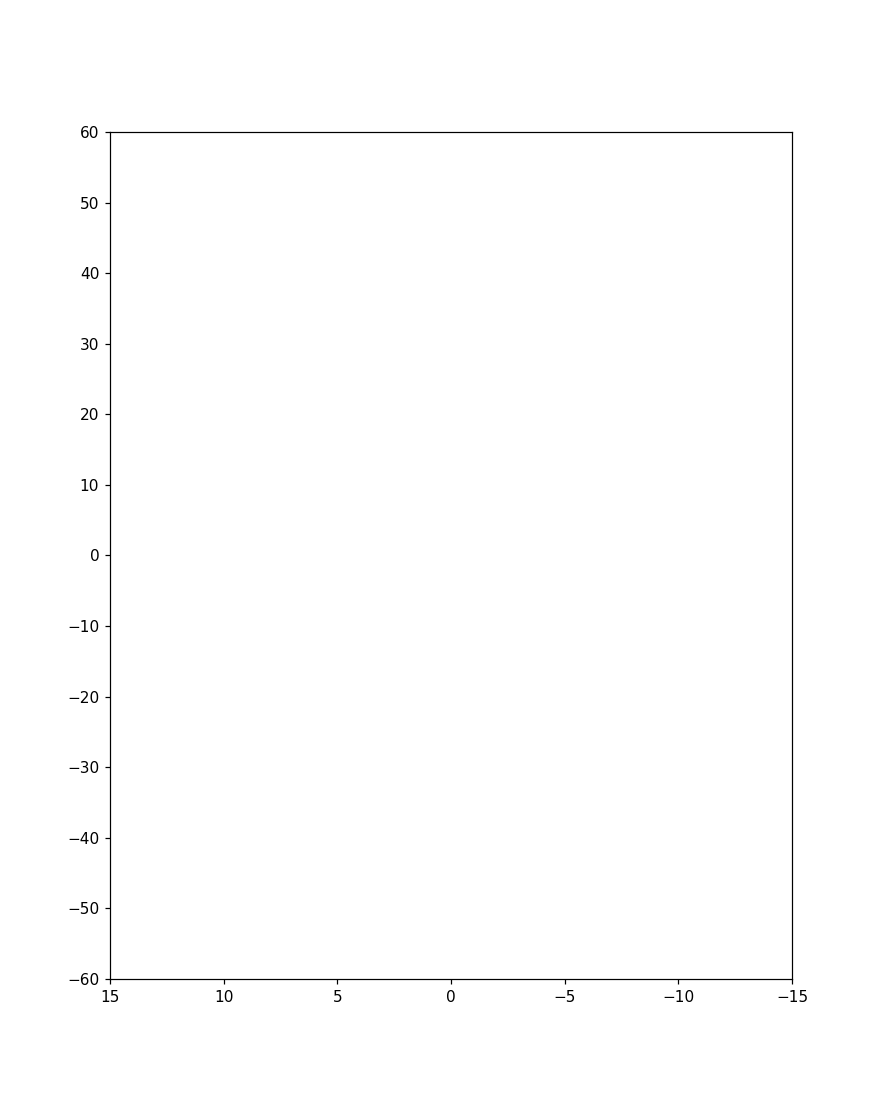

In [38]:
fig, ax = plt.subplots(figsize=(8, 10))
line, = ax.plot([], 'g.')     # A tuple unpacking to unpack the only plot
ax.set_xlim(15, -15)
ax.set_ylim(-60, 60)
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])

index = 3

def animate(ind):
    Layer = datas_filtered_01['Ibeo_Layer_stack'][0][ind]
    masking = (Layer == index)    
    X, Y = datas_filtered_01['Ibeo_X_stack'][0][ind], datas_filtered_01['Ibeo_Y_stack'][0][ind]
    X = X[masking]
    Y = Y[masking]
    line.set_data((Y, X))

anim = FuncAnimation(fig, animate, frames=594, interval=10)

### 1-4. 디바이스와 ID에 따라서 표현하기

<IPython.core.display.Javascript object>


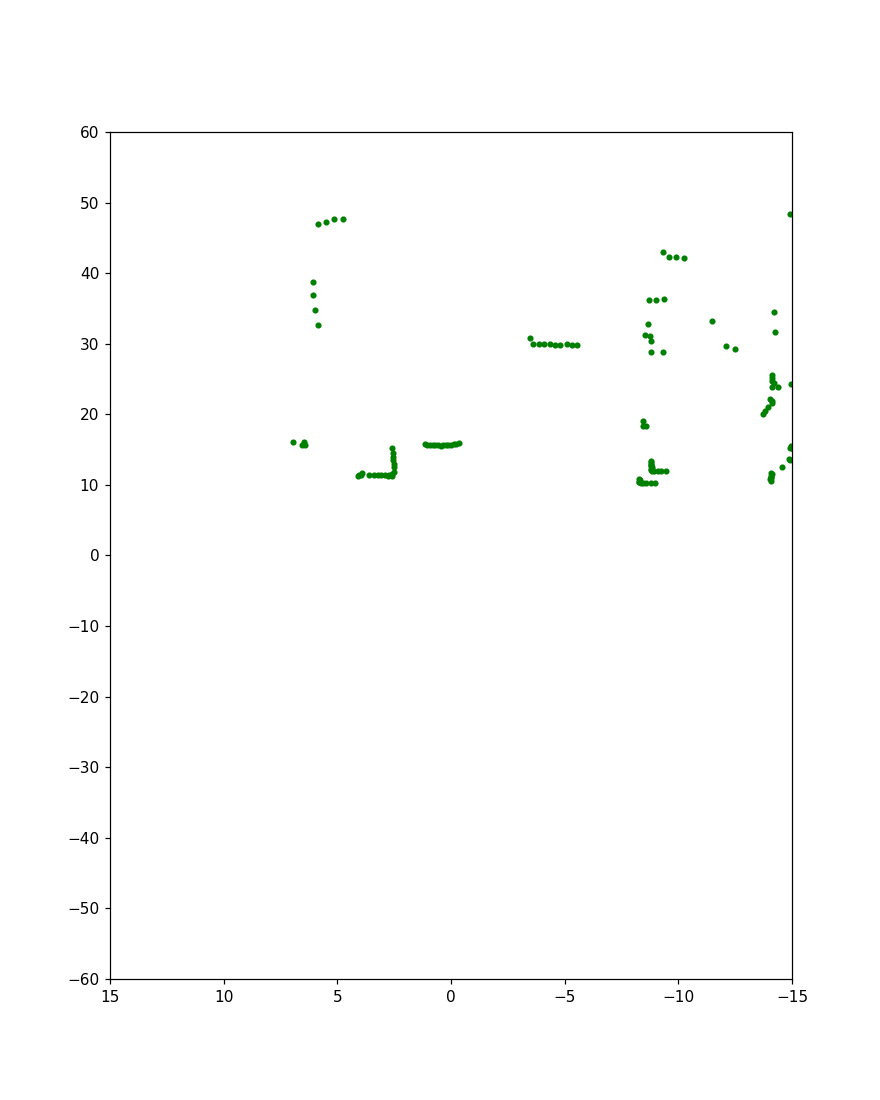

In [39]:
fig, ax = plt.subplots(figsize=(8, 10))
line, = ax.plot([], 'g.')     # A tuple unpacking to unpack the only plot
ax.set_xlim(15, -15)
ax.set_ylim(-60, 60)
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])

layer_ind = 2
device_ind = 1

def animate(ind):
    # Make mask
    Device = datas_filtered_01['Ibeo_DeviceID_stack'][0][ind]
    device_masking = (Device == device_ind)
    Layer = datas_filtered_01['Ibeo_Layer_stack'][0][ind]
    layer_masking = (Layer == layer_ind)
    
    masking = np.logical_and(device_masking, layer_masking)
    
    # get Data
    X, Y = datas_filtered_01['Ibeo_X_stack'][0][ind], datas_filtered_01['Ibeo_Y_stack'][0][ind]
    
    # Do masking
    X = X[masking]
    Y = Y[masking]
    
    # give datas
    line.set_data((Y, X))

anim = FuncAnimation(fig, animate, frames=594, interval=10)

# Matplotlib 3D Visualization 하기

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np

np.random.seed(7)

In [19]:
def gen_noise_datas(center, length):
    x = np.full(length, center[0]) + np.random.normal(0, 4, length)
    y = np.full(length, center[1]) + np.random.normal(0, 2, length)
    z = np.full(length, center[2]) + np.random.normal(0, 1, length)
    return (x, y, z)

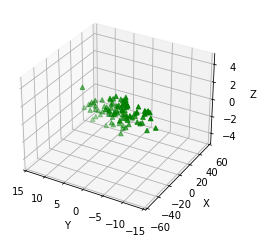

In [20]:
# Prepare figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Setting figure
ax.set(xlim3d=(15, -15), xlabel='Y')
ax.set(ylim3d=(-60, 60), ylabel='X')
ax.set(zlim3d=(-5, 5), zlabel='Z')

# Gen test data
length = 100
(x, y, z) = gen_noise_datas([0, 1, 0], 100)

# Draw datas
ax.scatter3D(x, y, z, color="green", marker='^')
# fig.colorbar()


<IPython.core.display.Javascript object>


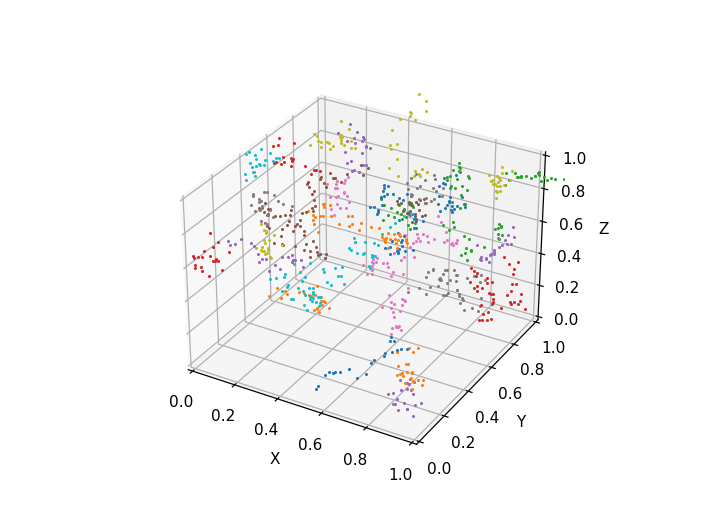

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30

walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [], "o", markersize=1)[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

<IPython.core.display.Javascript object>


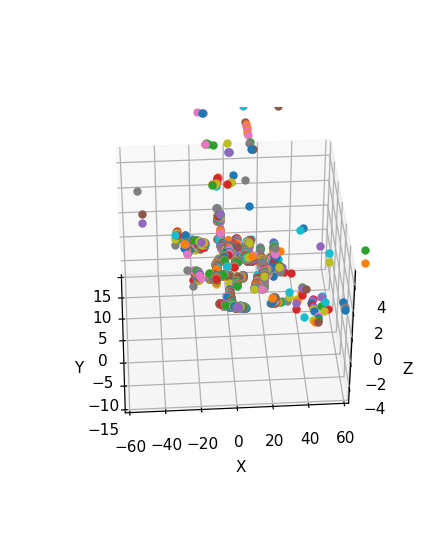

In [7]:
# 안됌!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# 길이가 다른 리스트를 계속해서 더해서 그런가....
# scatter 안의 data들을 길게 늘려도 될듯함...? ㄴㄴ 아직모름
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(4,5))
ax = fig.add_subplot(projection="3d")

def ani(ind, datas, big_scatters):
    scatters = big_scatters[ind]
    if ind != 0:
        b_scatters = big_scatters[ind-1]
        del b_scatters
        
    for i, scatter in enumerate(scatters):
        X = datas['Ibeo_X_stack'][0][ind][0] 
        Y = datas['Ibeo_Y_stack'][0][ind][0] 
        Z = datas['Ibeo_Z_stack'][0][ind][0]
        scatter._offsets3d = (Y, X, Z)
    return scatters

def ani2(ind, datas, scatters):
    for i, scatter in enumerate(scatters):
        try:
            X = datas['Ibeo_X_stack'][0][ind][0][i:i+1]
            Y = datas['Ibeo_Y_stack'][0][ind][0][i:i+1]
            Z = datas['Ibeo_Z_stack'][0][ind][0][i:i+1]
        except Exception as e:
            X, Y, Z = 0, 0, 0
            
        scatter._offsets3d = (Y, X, Z) # 길이가 있는 list가 들어오길 바람.
    return scatters


# Create Points initially without data 
step = len(datas_filtered_01['Ibeo_X_stack'][0])
n_lists = datas_filtered_01['Ibeo_X_stack'][0]

# big_scatters = []
# for t_step in range(step):
#     n_point = n_lists[t_step].shape[1]
#     scatters = [ax.scatter([], [], [])] * n_point
#     big_scatters.append(scatters)

# 각 점을 위치변환 시켜주기
scatters = [ax.scatter([], [], []) for _ in range(4882)]


# Setting the axes properties
ax.set(xlim3d=(15, -15), xlabel='Y')
ax.set(ylim3d=(-60, 60), ylabel='X')
ax.set(zlim3d=(-5, 5), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(fig, ani2, step blit=False, repeat=True, fargs=(datas_filtered_01, scatters))

In [15]:
datas_filtered_01 = {}
datas_filtered_01['Ibeo_DeviceID_stack'] = datas['Ibeo_DeviceID_stack']
datas_filtered_01['Ibeo_Layer_stack'] = datas['Ibeo_Layer_stack']
datas_filtered_01['Ibeo_X_stack'] = datas['Ibeo_X_stack']
datas_filtered_01['Ibeo_Y_stack'] = datas['Ibeo_Y_stack']
datas_filtered_01['Ibeo_Z_stack'] = datas['Ibeo_Z_stack']

In [27]:
_, n_datas = datas['Ibeo_X_stack'].shape
max_iter = 0
for i in range(n_datas):
    _, current_iter = datas['Ibeo_X_stack'][0][i].shape
    if current_iter > max_iter:
        max_iter = current_iter

max_iter

4882

In [6]:
datas['Ibeo_X_stack'][0][0]

array([[-4.26322126, -4.43682671, -4.25360012, ...,  3.25570345,
         4.94441175,  3.18551135]])

/tmp/ipykernel_67549/4179737632.py:60: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


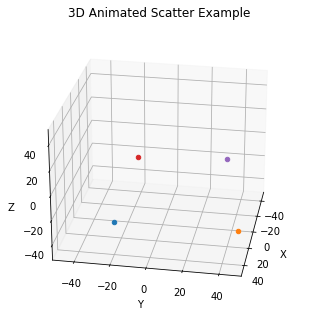

In [2]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def generate_data(nbr_iterations, nbr_elements):
    """
    Generates dummy data.
    The elements will be assigned random initial positions and speed.
    Args:
        nbr_iterations (int): Number of iterations data needs to be generated for.
        nbr_elements (int): Number of elements (or points) that will move.
    Returns:
        list: list of positions of elements. (Iterations x (# Elements x Dimensions))
    """
    dims = (3,1)

    # Random initial positions.
    gaussian_mean = np.zeros(dims)
    gaussian_std = np.ones(dims)
    start_positions = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Random speed
    start_speed = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Computing trajectory
    data = [start_positions]
    for iteration in range(nbr_iterations):
        previous_positions = data[-1]
        new_positions = previous_positions + start_speed
        data.append(new_positions)

    return data

def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for i in range(data[0].shape[0]):
        scatters[i]._offsets3d = (data[iteration][i,0:1], data[iteration][i,1:2], data[iteration][i,2:])
    return scatters

def main(data, save=False):
    """
    Creates the 3D figure and animates it with the input data.
    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """

    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Initialize scatters
    scatters = [ ax.scatter(data[0][i,0:1], data[0][i,1:2], data[0][i,2:]) for i in range(data[0].shape[0]) ]

    # Number of iterations
    iterations = len(data)

    # Setting the axes properties
    ax.set_xlim3d([-50, 50])
    ax.set_xlabel('X')

    ax.set_ylim3d([-50, 50])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-50, 50])
    ax.set_zlabel('Z')

    ax.set_title('3D Animated Scatter Example')

    # Provide starting angle for the view.
    ax.view_init(25, 10)

    ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                       interval=50, blit=False, repeat=True)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
        ani.save('3d-scatted-animated.mp4', writer=writer)

    plt.show()


data = generate_data(100, 5)
main(data, save=True)